## Imports and path setup


In [7]:
from pathlib import Path
import sys

ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
SRC = ROOT / 'src'
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))

try:
    import zinc_dwt
    ROOT = Path(zinc_dwt.__file__).parents[2]
except ImportError:
    pass

from zinc_dwt import (
    DEFAULT_LABELS,
    DEFAULT_LEVEL,
    DEFAULT_NUM_CYCLES,
    DEFAULT_WAVELET,
    compute_cycle_extrema_for_df,
    decompose_wavelet_reconstructed,
    ion_to_tex,
    load_combined_csv,
    make_palette,
    plot_cyclic_multi_comparison,
    plot_cycle_max_min,
    plot_diff_boxplots,
    set_mpl_style,
)


## Load data


In [8]:
data_dir = ROOT / 'data' / '02'
df = load_combined_csv(
    data_dir,
    skiprows=6,
    value_col=2,
    rename_columns=DEFAULT_LABELS,
)
df.head()


,Pristine,Li+,Na+,K+,Rb+,Mg2+,Ca2+,Sr2+,Ba2+,LMZ,LNZ,NMZ,NKZ,NRZ
0,0.000011,-0.000006,-0.000003,-8.844107e-08,-0.000001,-0.000003,0.000018,0.000020,0.000021,0.000007,-0.000035,-0.000008,-0.000020,-0.000005
1,0.000002,-0.000008,-0.000005,-5.315410e-06,-0.000003,-0.000004,0.000009,0.000014,0.000010,0.000003,-0.000034,-0.000007,-0.000018,-0.000005
2,-0.000004,-0.000009,-0.000004,-6.404564e-06,-0.000006,-0.000005,0.000003,0.000007,0.000002,-0.000001,-0.000036,-0.000005,-0.000021,-0.000008
3,-0.000006,-0.000011,-0.000006,-6.528026e-06,-0.000007,-0.000005,-0.000003,0.000002,-0.000004,-0.000004,-0.000035,-0.000007,-0.000019,-0.000008
4,-0.000009,-0.000011,-0.000005,-8.702658e-06,-0.000009,-0.000006,-0.000006,-0.000004,-0.000006,-0.000007,-0.000037,-0.000006,-0.000021,-0.000010


## Compute cycle extrema


In [9]:
set_mpl_style(font_family='Arial', font_size=12, unicode_minus=False, use_offset=False)

scales, cycle_max_all, cycle_min_all = compute_cycle_extrema_for_df(
    df,
    wavelet=DEFAULT_WAVELET,
    level=DEFAULT_LEVEL,
    num_cycles=DEFAULT_NUM_CYCLES,
)


## Cyclic comparison plots


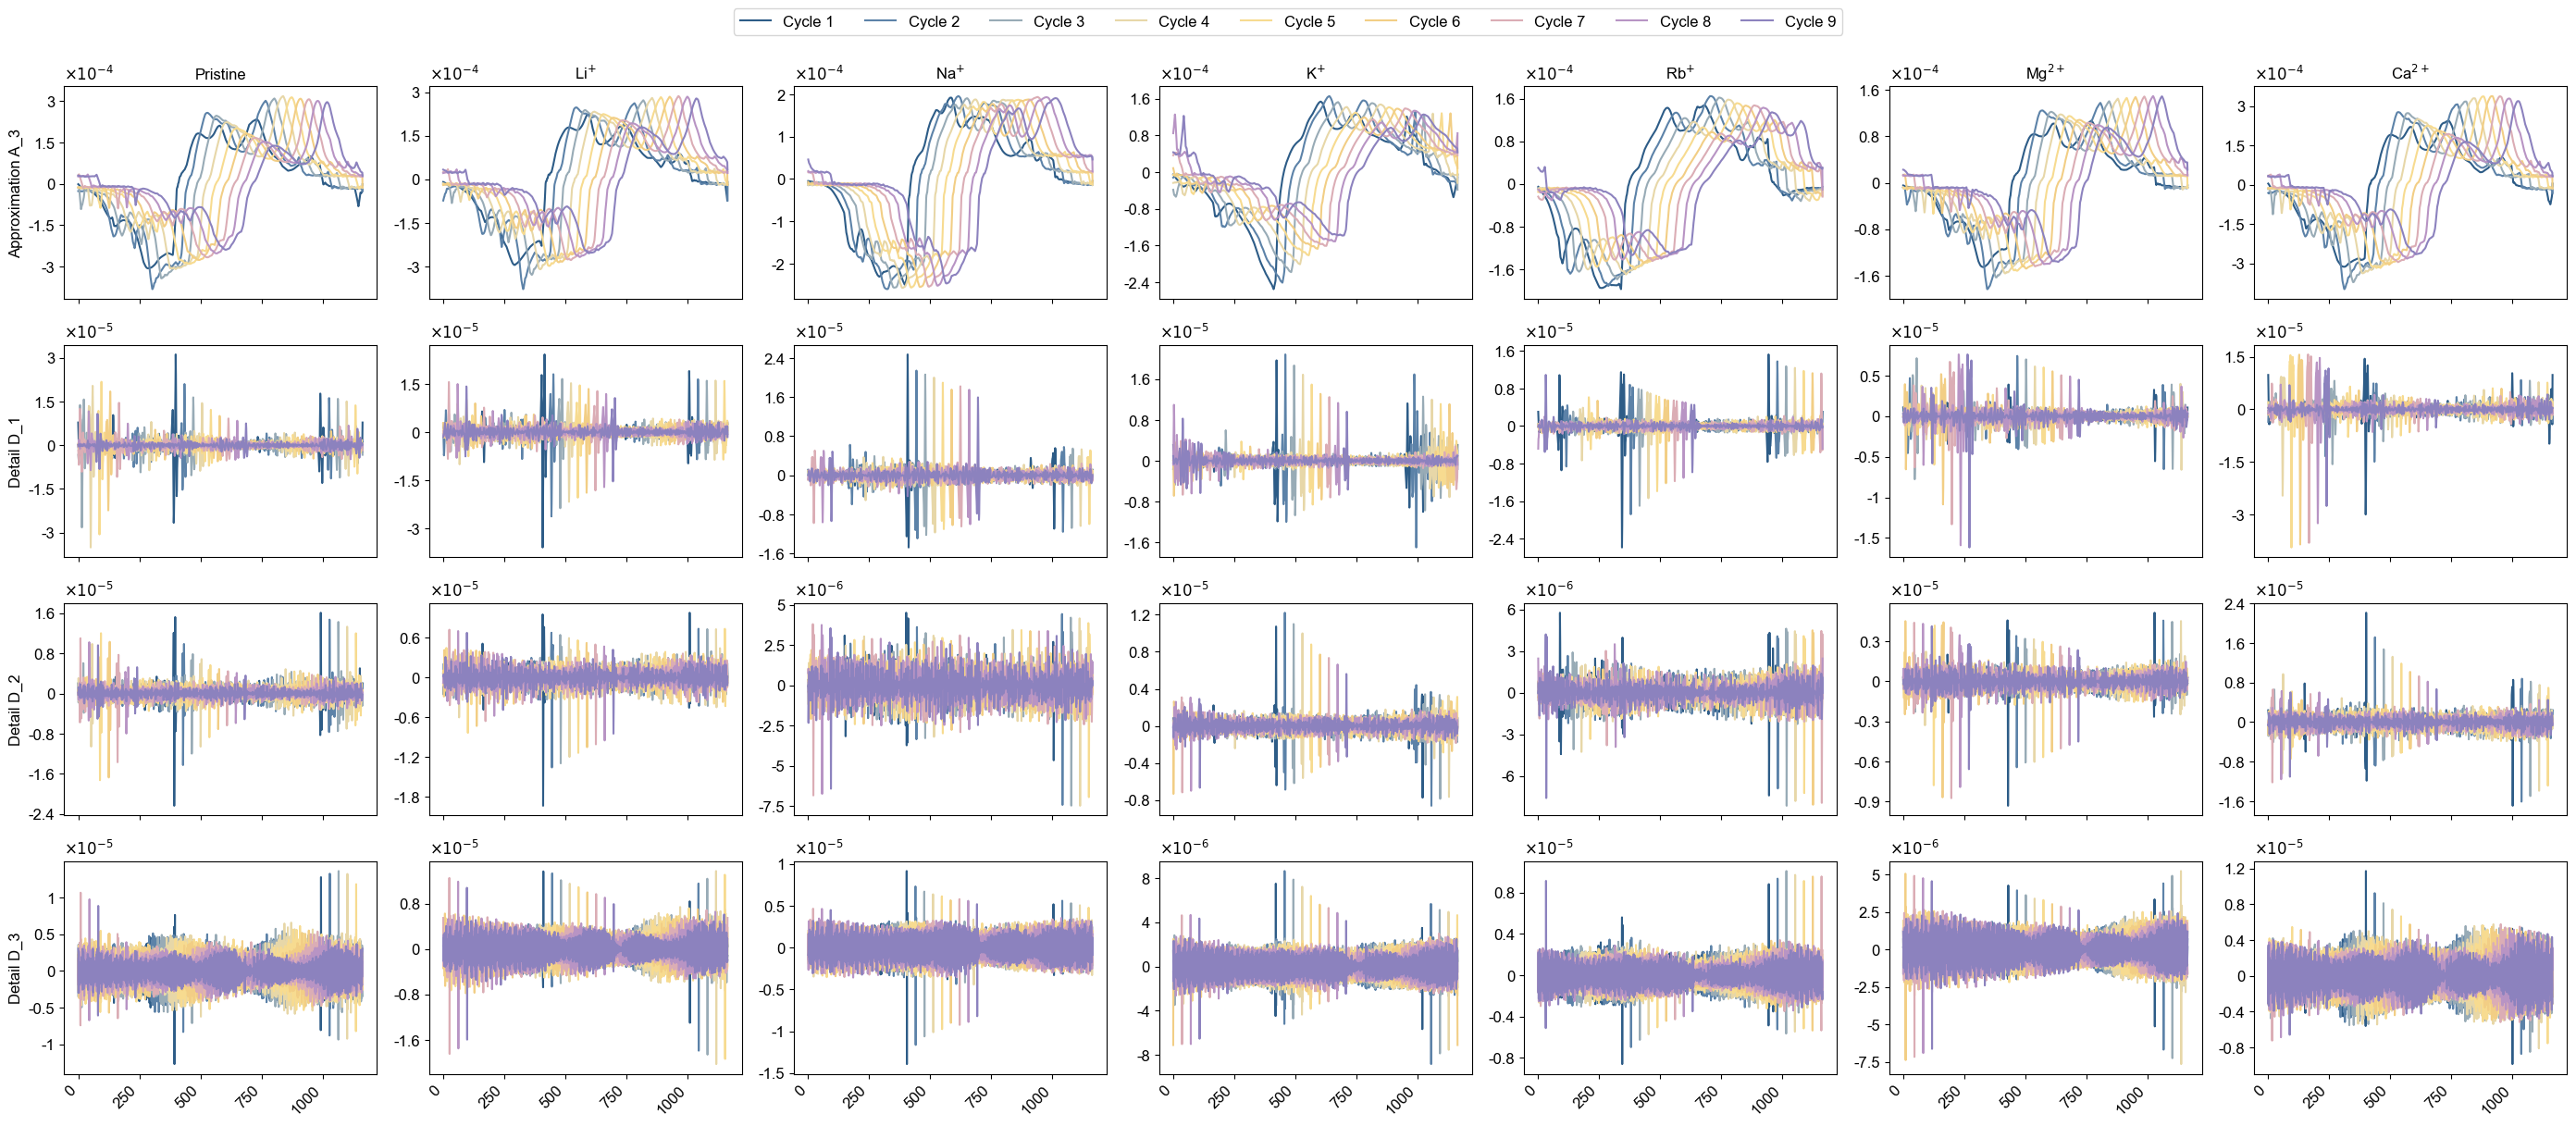

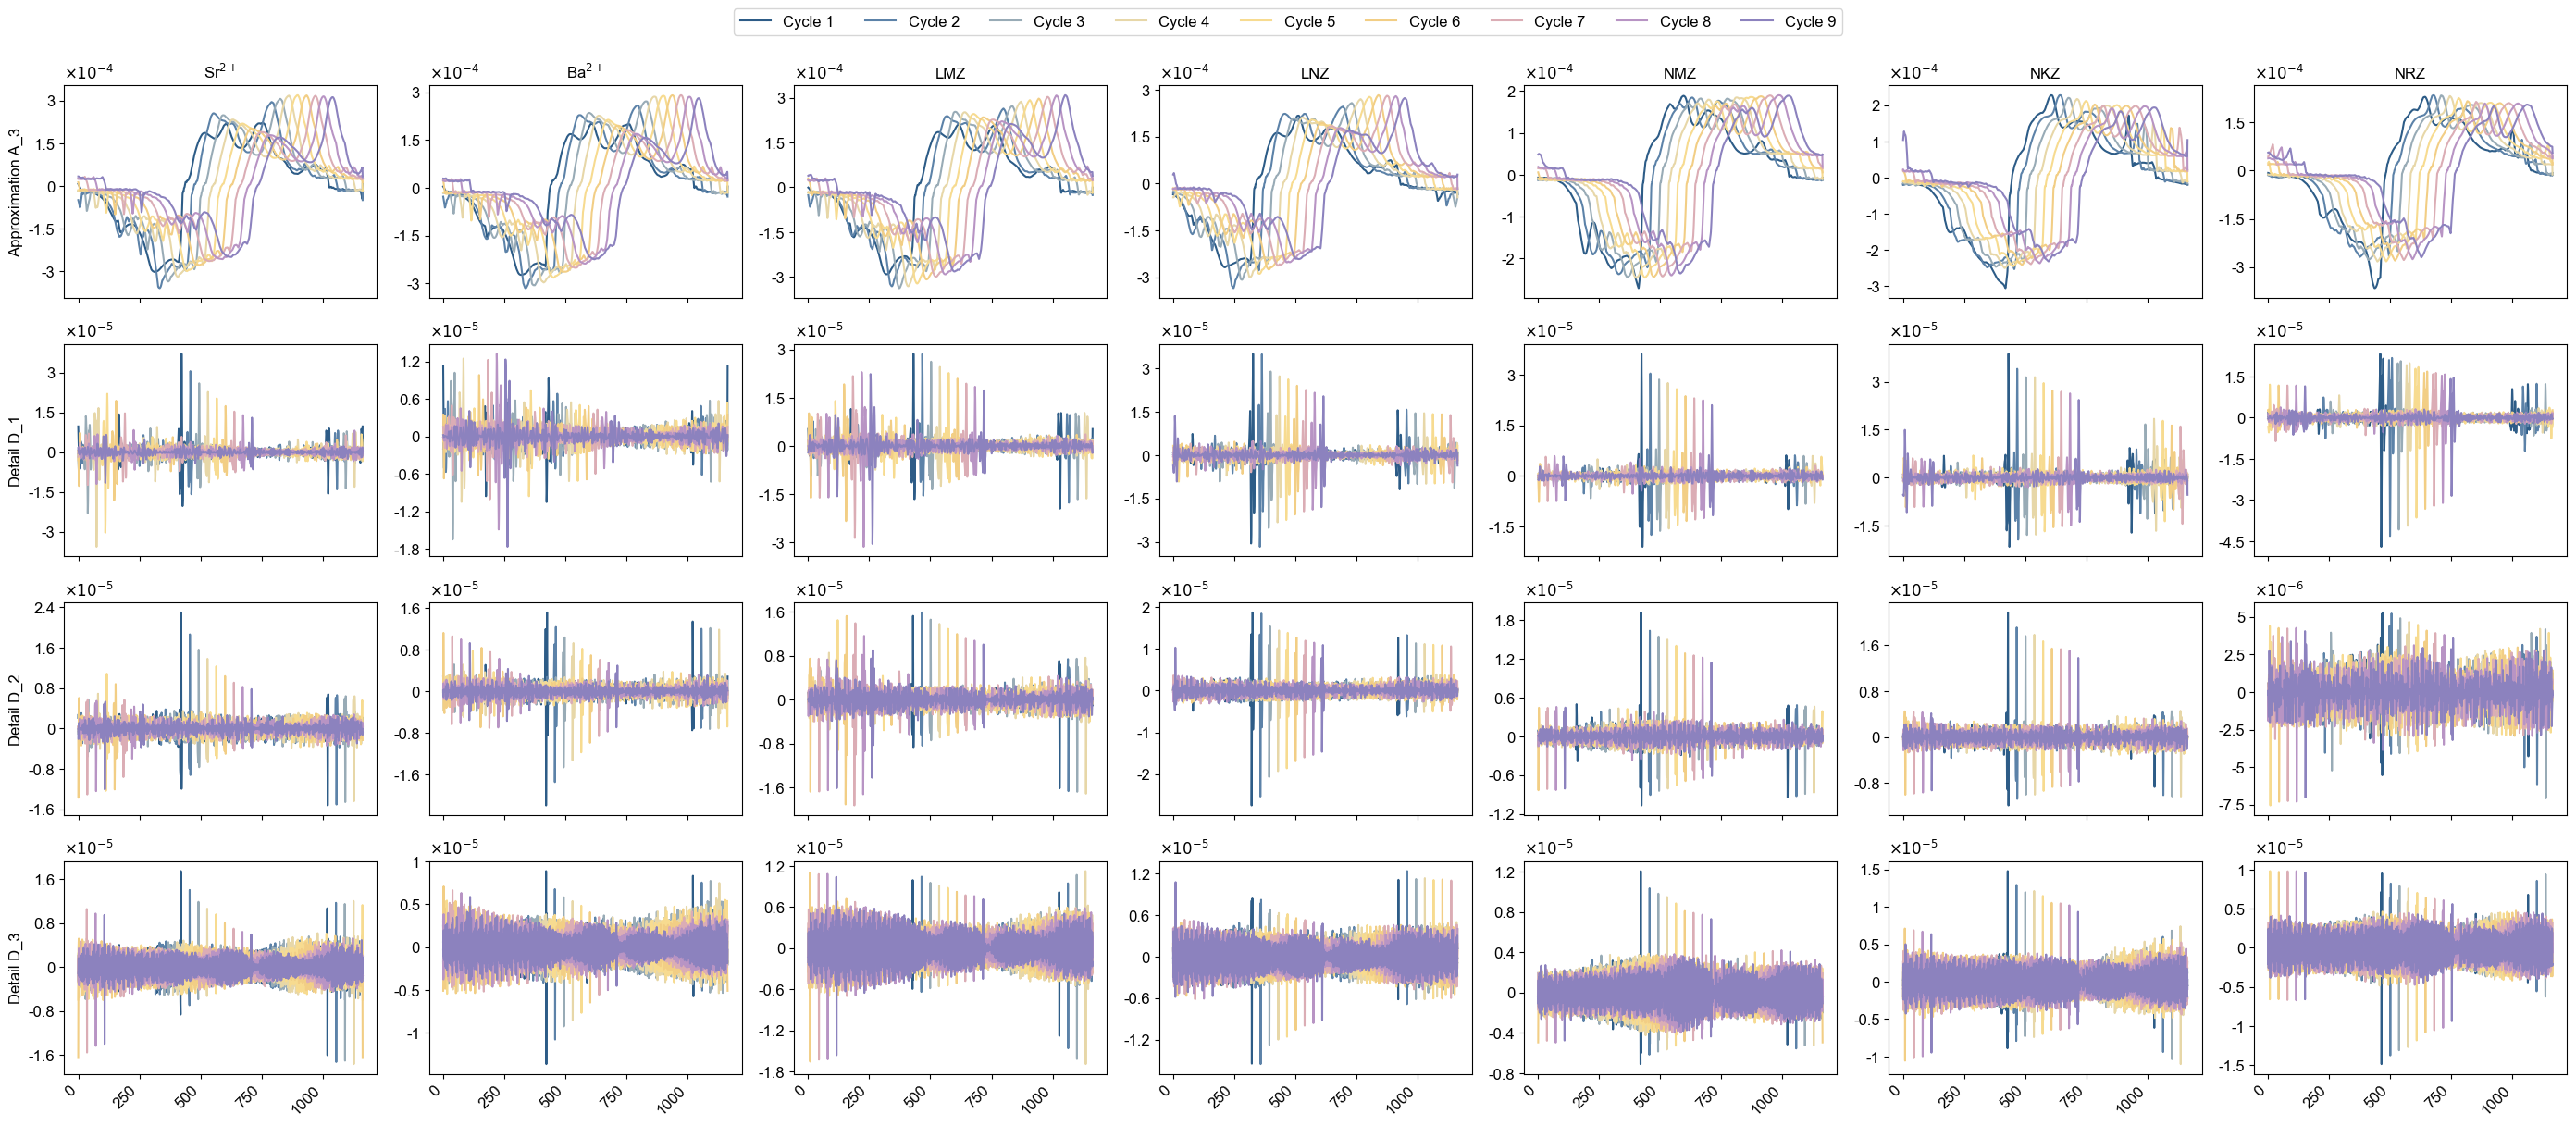

In [10]:
signals_list = [
    decompose_wavelet_reconstructed(df[col].values, wavelet=DEFAULT_WAVELET, level=DEFAULT_LEVEL)
    for col in df.columns
]
labels = [ion_to_tex(col) for col in df.columns]

signals_batch1 = signals_list[:7]
labels_batch1 = labels[:7]
plot_cyclic_multi_comparison(
    signals_batch1,
    labels_batch1,
    num_cycles=DEFAULT_NUM_CYCLES,
    unify_x=False,
    show=True,
)

signals_batch2 = signals_list[7:14]
labels_batch2 = labels[7:14]
plot_cyclic_multi_comparison(
    signals_batch2,
    labels_batch2,
    num_cycles=DEFAULT_NUM_CYCLES,
    unify_x=False,
    show=True,
)


## Per-cycle maxima and minima


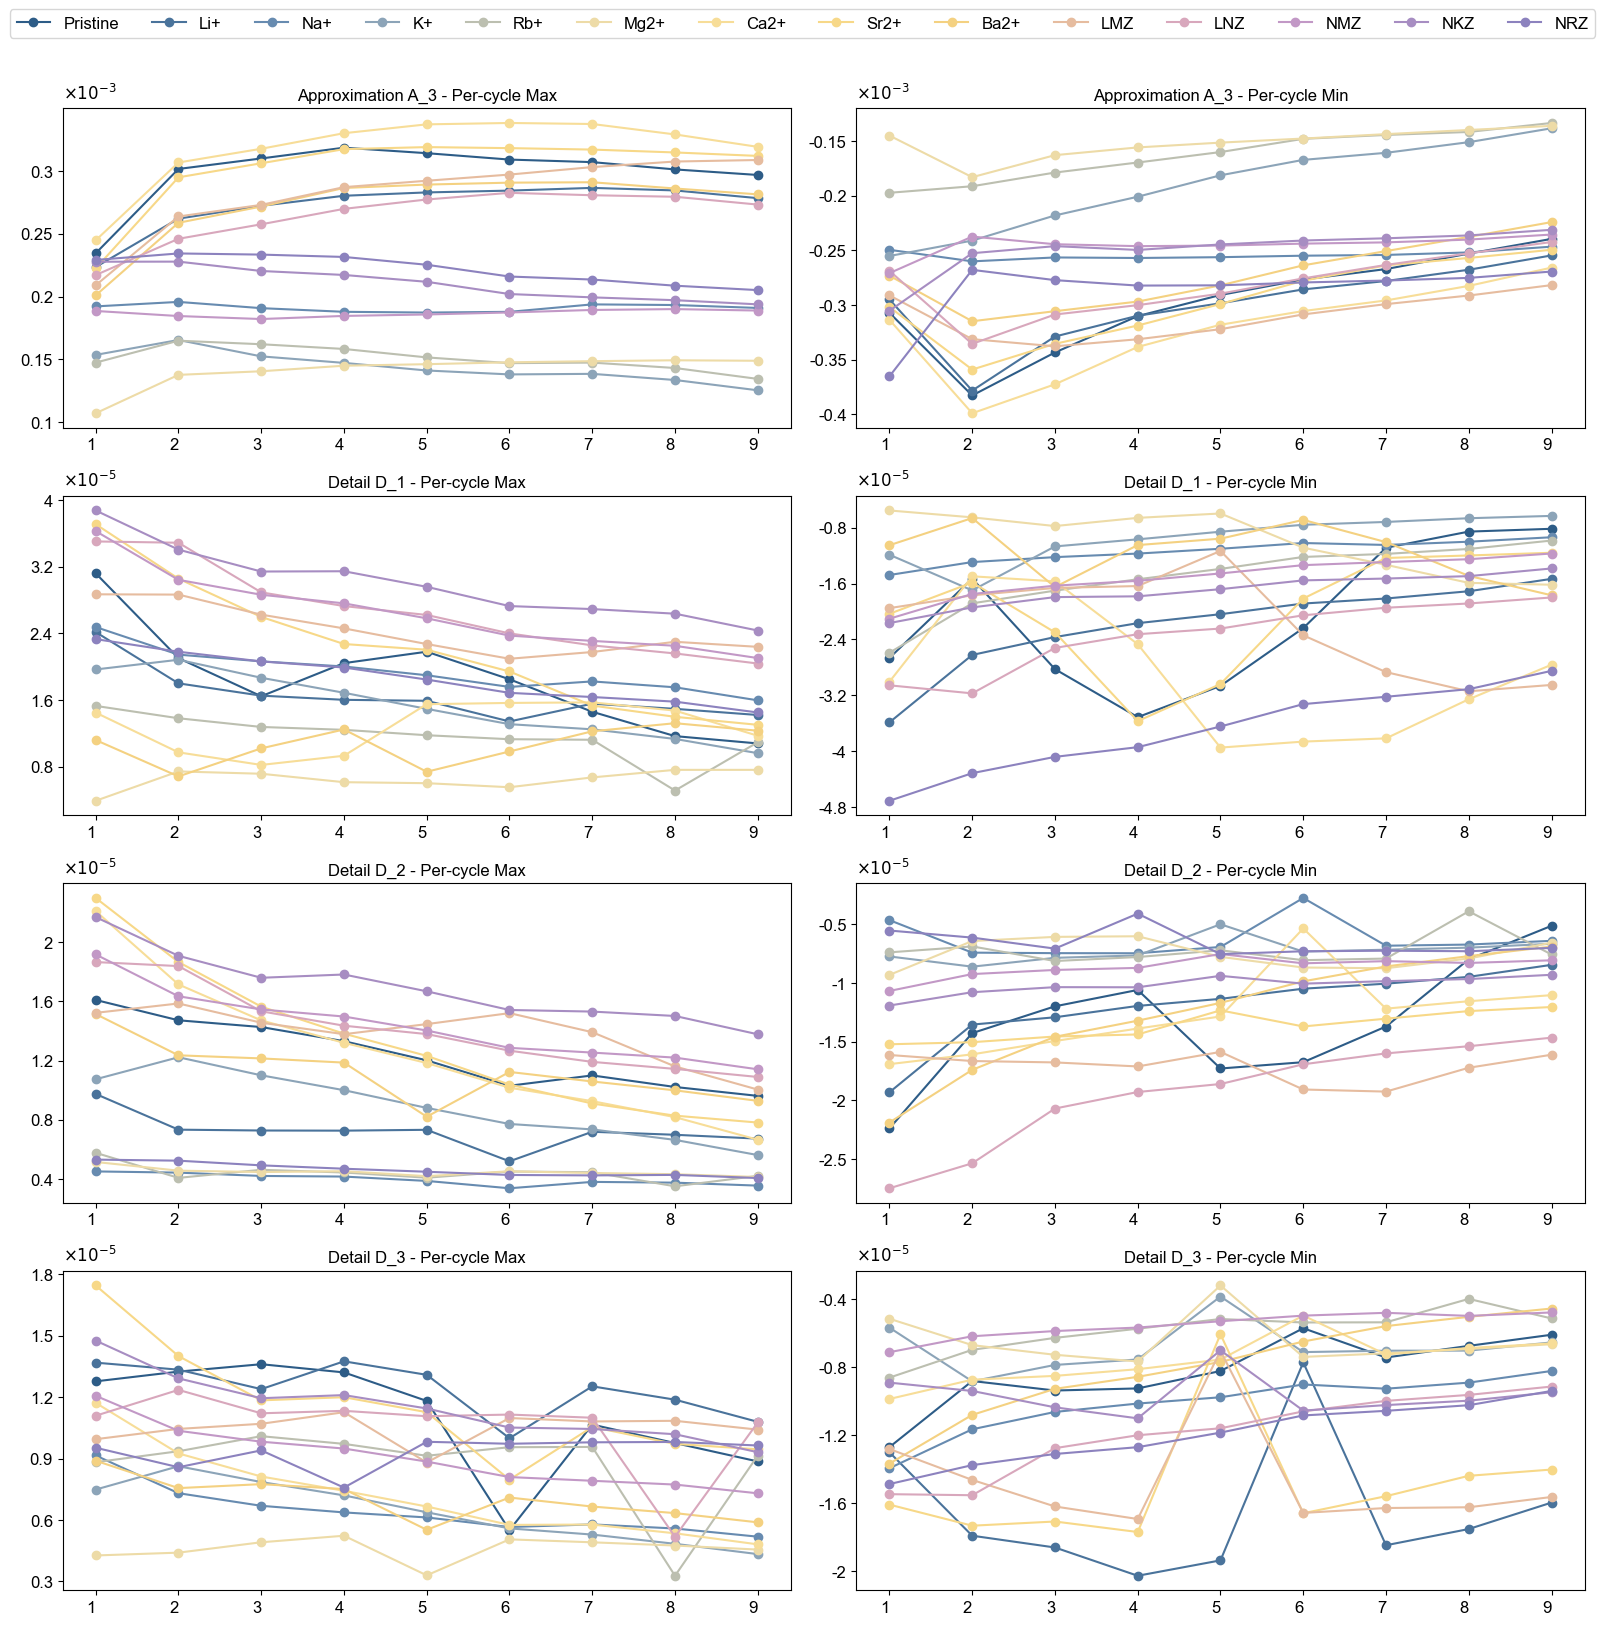

In [11]:
colors = make_palette(len(df.columns))
plot_cycle_max_min(
    scales,
    cycle_max_all,
    cycle_min_all,
    num_cycles=DEFAULT_NUM_CYCLES,
    colors=colors,
    fixed_exp_by_row={0: -3},
    show=True,
)


## Differences of per-cycle extrema (boxplots)


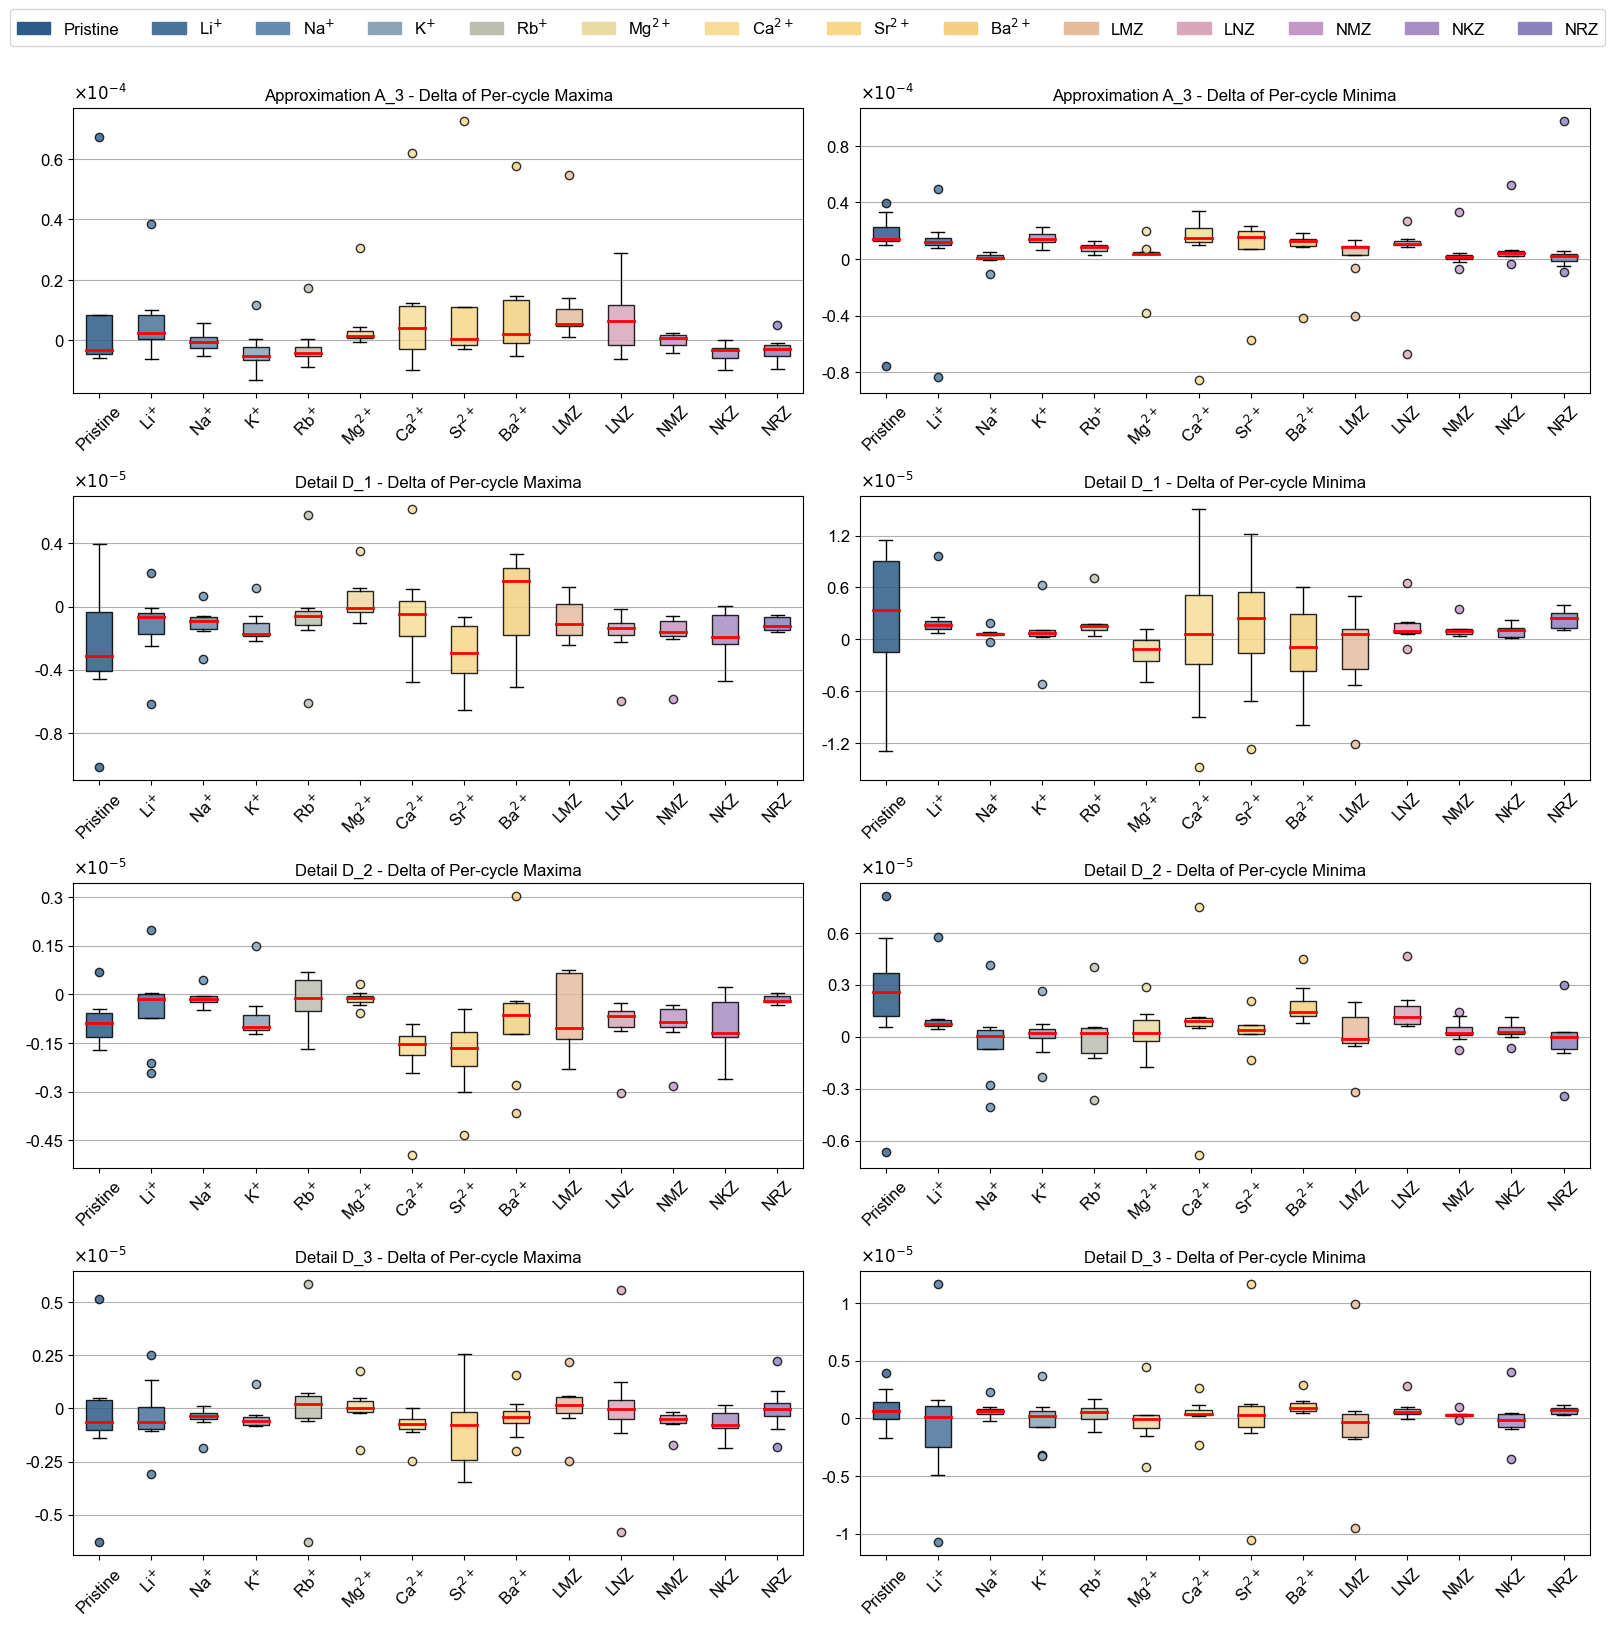

In [12]:
plot_diff_boxplots(
    scales,
    df,
    cycle_max_all,
    cycle_min_all,
    fixed_exp_by_row={0: -4, 1: -5, 2: -5, 3: -5},
    rotate_labels=45,
    show=True,
)